In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("linear-regression-dataset.csv")


In [4]:
df.head(5)

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


In [5]:
df.describe()


,experience,salary
count,14.000000,14.000000
mean,6.250000,8778.571429
std,4.979767,5733.495185
min,0.000000,2250.000000
25%,2.250000,4125.000000
50%,5.500000,7750.000000
75%,9.500000,12000.000000
max,15.000000,20000.000000


In [6]:
cdf=df[['experience','salary']]

In [7]:
cdf.head(5)

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f305eca79e8>,
      dtype=object)

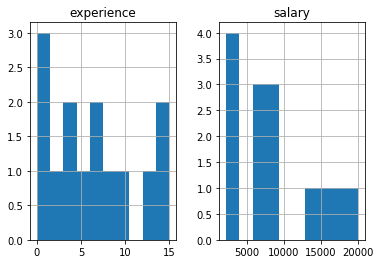

In [10]:
viz=cdf[['experience','salary']]
viz.hist()

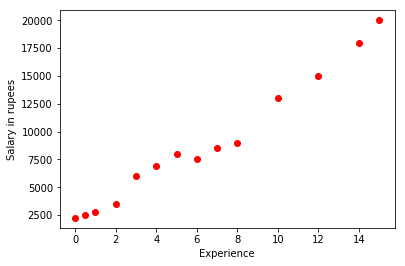

In [13]:
plt.scatter(cdf.experience, cdf.salary,  color='red')
plt.xlabel("Experience")
plt.ylabel("Salary in rupees")
plt.show()


In [26]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [27]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['experience']])
train_y = np.asanyarray(train[['salary']])
lr.fit (train_x, train_y)
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [[1103.35018963]]
Intercept:  [1661.5676359]


Text(0,0.5,'Salary')

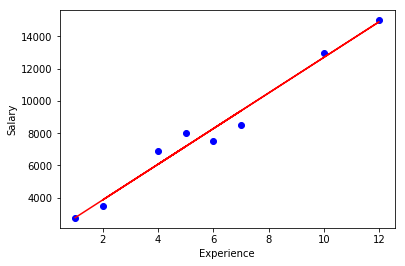

In [36]:
plt.scatter(train.experience, train.salary,  color='blue')
plt.plot(train_x, lr.coef_[0][0]*train_x + lr.intercept_[0], '-r')
plt.xlabel("Experience")
plt.ylabel("Salary")

In [38]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['experience']])
test_y = np.asanyarray(test[['salary']])
test_y_hat = lr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))

#R2 score is predicting the accuracy of the model and how best the line fits to the dataset
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 1011.94
R2-score: 0.97
